# Análise de dados sobre os bolsistas de iniciação científica (IC) ou iniciação tecnológica (IT) do Instituto Metrópole Digital - IMD

Este trabalho propõe utilizar dados fornecidos pelo Portal de Dados Abertos da Universidade Federal do Rio Grande do Norte (UFRN) - http://dados.ufrn.br/ - para determinar a distribuição do número de bolsistas de iniciação científica ou tecnológica que fazem parte dos alunos ingressantes no Instituto Metrópole Digital; quantos bolsistas, discentes ingressantes de 2013 do IMD, passaram para a pós-graduação em 2016; identificar quais docentes participaram, em maior quantidade, como orientadores nos projetos dos discentes do IMD; e encontrar a distribuição, dos projetos que foram desenvolvidos, ao longo do período determinado por este estudo.

Devido aos dados disponíveis no Portal de Dados Abertos da UFRN e a inauguração do Instituto Metrópole Digital em 2013, foi determinado que o período a ser analisado neste estudo é de 2013 a 2016.

In [1]:
#Bibliotecas utilizadas neste documento
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Bolsistas de Iniciação Científica ou Tecnológica
bolsistas_url = 'http://bit.do/egeSD'
bolsistas = pd.read_csv(bolsistas_url, sep=';')

bolsistas.rename(columns={'status':'status_projeto'}, inplace=True)
bolsistas.rename(columns={'ano': 'ano_projeto'}, inplace=True)
bolsistas.rename(columns={'unidade': 'unidade_projeto'}, inplace=True)

bolsistas

,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano_projeto,id_orientador,orientador,categoria,...,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,id_unidade,unidade_projeto,status_projeto,Unnamed: 20
0,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,ELEMENTOS DO COMPORTAMENTO ORGANIZACIONAL:Tipo...,PVE513-2008,5487590,2008,23198,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),...,Gestão de Organizações Sociais;Trabalho Volunt...,43.0,GRUPO DE ESTUDOS E PESQUISAS EM GESTÃO INSTITU...,2008-2009,2008-11-06,2009-07-31 00:00:00,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO,NaN
1,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,Geração e disseminação da inovação na carcinic...,PVE2463-2008,5554243,2008,64653,MARIANA BALDI,Iniciação Científica (IC),...,Organizações e comportamento organizacional,38.0,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2008-2009,2008-08-25,2008-11-06 13:35:24.877,161,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO,NaN
2,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2007,1179265,2007,64653,MARIANA BALDI,Iniciação Científica (IC),...,Organizações e comportamento organizacional;;;,38.0,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2007-2008,2007-08-01,2008-07-31 00:00:00,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO,NaN
3,88234,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,11687003,2009,23198,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),...,Análise e Avaliação de Políticas Públicas;;;,NaN,NaN,2009-2010,2009-08-01,2009-12-25 00:00:00,161,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO,NaN
4,545009,2011049415,ABEL LUIS DA SILVA NETO,Estudo de Antenas com Reflectarrays e suas Apl...,PVG6992-2013,97873251,2013,5754609,ADAILDO GOMES D ASSUNCAO,Iniciação Tecnológica (IT),...,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",16.0,GRUPO DE MICROONDAS E ANTENAS,2013-2014,2013-08-14,2014-06-26 00:00:00,5204,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES - DCO,PENDENTE DE RELATORIO,NaN
5,74553,200234893,ABESON CORINGA DE MOURA,A HISTÓRIA DO MOVIMENTO DA MATEMÁTICA MODERNA ...,PVB758-2004,37402,2004,24417,ARLETE DE JESUS BRITO,Iniciação Científica (IC),...,História da Educação no Brasil;História da Ciê...,112.0,MATEMÁTICA E CULTURA,2004-2005,2004-08-01,2005-07-31 00:00:00,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA - CCET,FINALIZADO,NaN
6,556964,2012903661,ABIGAIL RUTE DA SILVA,Mapeamento dos serviços ambientais prestados p...,PVF10463-2014,100699863,2014,5756052,DIOGENES FELIX DA SILVA COSTA,Iniciação Científica (IC),...,Riscos geomorfológicos e dinâmica do meio físi...,122863586.0,Grupo de Pesquisa em Gerenciamento dos Riscos ...,2014-2015,2015-02-19,2015-07-31 00:00:00,234,CERES - DEPARTAMENTO DE GEOGRAFIA - DGC/CERES,FINALIZADO,NaN
7,531864,2010050304,ABIMAELLE SILVA CHIBÉRIO,Adsorção em Leito Expandido para recuperação e...,PVG9198-2013,95388684,2013,24802,EVERALDO SILVINO DOS SANTOS,Iniciação Científica (IC),...,Recuperação e Purificação de Biomoléculas,911652.0,Engenharia de Bioprocessos,2013,2013-08-05,2013-12-31 00:00:00,57,DEPARTAMENTO DE ENGENHARIA QUIMICA - DEQ/CT,FINALIZADO,NaN
8,531864,2010050304,ABIMAELLE SILVA CHIBÉRIO,Adsorção em Leito Expandido para recuperação e...,PVG9198-2013,95388684,2013,24802,EVERALDO SILVINO DOS SANTOS,Iniciação Científica (IC),...,Recuperação e Purificação de Biomoléculas,911652.0,Engenharia de Bioprocessos,2014,2014-02-07,2015-02-03 00:00:00,57,DEPARTAMENTO DE ENGENHARIA QUIMICA - DEQ/CT,FINALIZADO,NaN
9,523514,2009027132,ABIQUEILA ANGELO RIBEIRO,UM ESTUDO DA VIOLÊNCIA CONTRA CRIANÇAS E ADOLE...,PVE2836-2010,4902022,2010,22752,MARIA DALVA HORACIO DA COSTA,Iniciação Científica (IC),...,Proteção Social e Cidadania,1385230.0,GRUPO DE ESTUDOS E PESQUISA EM SEGURIDADE SOCI...,2011,2011-10-03,2011-12-31 00:00:00,162,DEPARTAMENTO DE SERVIÇO SOCIAL - DESSO - DESSO...,FINALIZADO,NaN


In [5]:
#Alunos ingressantes de 2013
discentes2013_url = 'http://bit.do/egeUM'
discentes2013 = pd.read_csv(discentes2013_url, sep=';')

#Retirando as linhas com dados faltantes em 'matricula'
discentes2013.drop(labels=[3090, 20654], inplace=True)

#Adequando os dados de 'matricula' para o tipo inteiro
discentes2013.matricula = discentes2013.matricula.astype(np.int64)

discentes2013

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,2013010008,ABA-ELBER GEORGE PEREIRA CAVALCANTE,2013,1.0,REINGRESSO AUTOMATICO,REGULAR,CANCELADO,G,GRADUAÇÃO,2000054.0,MATEMÁTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1,2013309148,ABDENOR BEZERRA DOS SANTOS,2013,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,2013092308,ABDENOR BEZERRA DOS SANTOS,2013,2.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,118834827.0,COMUNICAÇÃO SOCIAL- PUBLICIDADE E PROPAGANDA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
3,2013335827,ABDOM DOS SANTOS CANINDÉ,2013,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
4,2013320691,ABELARDO BRUNDLE RODRIGUEZ DANTAS,2013,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
5,2013303574,ABEL LAMEQUE SILVA DAMASCENO,2013,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
6,2013121007,ABEL SILVINO DO MONTE,2013,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013016861,ABESON CORINGA DE MOURA,2013,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,2000013.0,CIÊNCIA DA COMPUTAÇÃO,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
8,2013360211,ABIAS DIAS TAVARES DE ARAUJO,2013,2.0,PROCESSO SELETIVO,REGULAR,CONCLUÍDO,T,TÉCNICO,106573674.0,TÉCNICO EM AGRONEGÓCIO SUBS. - TOUROS - PRONATEC,PRESENCIAL,8919.0,ESCOLA AGRICOLA DE JUNDIAI - PRONATEC,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
9,2013341261,ABIGAIL ALVES DE LIMA,2013,1.0,PROCESSO SELETIVO,REGULAR,ATIVO,T,TÉCNICO,50566677.0,TÉCNICO EM VIGILÂNCIA EM SAÚDE,PRESENCIAL,205.0,ESCOLA DE SAÚDE,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [6]:
#Alunos ingressantes de 2014
discentes2014_url = 'http://bit.do/egeWb'
discentes2014 = pd.read_csv(discentes2014_url, sep=';')

#Adequando os dados de 'periodo_ingresso' para o tipo float
discentes2014.periodo_ingresso = discentes2014.periodo_ingresso.astype(np.float64)

discentes2014

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,2014000000,A,2014,1.0,ALUNO ESPECIAL,ESPECIAL,ATIVO,G,GRADUAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014338411,AARON LEONEL DE ALMEIDA DAMASCENO,2014,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,4746233.0,TECNICO EM AGROPECUARIA SUBSEQUENTE,PRESENCIAL,351.0,ESCOLA AGRÍCOLA DE JUNDIAÍ,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,2014351932,ABDENIO VICTOR PEREIRA DA SILVA,2014,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,108837709.0,CURSO TÉCNICO EM MANUTENÇÃO E SUPORTE EM INFOR...,PRESENCIAL,205.0,ESCOLA DE SAÚDE,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
3,2014048289,ABDIAS MARTINS DE CASTRO NETO,2014,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
4,2014322574,ABDI SADDAI COSTA DE ARAÚJO,2014,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
5,2014066385,ABDOM DOS SANTOS CANINDÉ,2014,1.0,SiSU,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
6,2014100905,ABDON SILVA RIBEIRO DA CUNHA,2014,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,D,DOUTORADO,315765.0,DOUTORADO EM ADMINISTRAÇÃO,PRESENCIAL,74.0,PROGRAMA DE PÓS-GRADUAÇÃO EM ADMINISTRAÇÃO,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
7,2014128880,ABELARDO MONTEIRO BEZERRA DE MELO NETO,2014,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014036760,ABEL MENDONCA ALVES,2014,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,2000056.0,MEDICINA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
9,2014313127,ABEL VENANCIO DO VALE,2014,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [7]:
#Alunos ingressantes de 2015
discentes2015_url = 'http://bit.do/egeWx'
discentes2015 = pd.read_csv(discentes2015_url, sep=';')
discentes2015

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,2015092254,ABIGAIL DANTAS TEIXEIRA,2015,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000004.0,ADMINISTRAÇÃO,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
1,2015306913,ABÍLIO GABRIEL MAIA DE LIMA,2015,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,2015108990,ABIMAEL ESDRAS CARVALHO DE MOURA LIRA,2015,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,E,MESTRADO,315780.0,MESTRADO EM HISTÓRIA,PRESENCIAL,435.0,PROGRAMA DE PÓS-GRADUAÇÃO EM HISTÓRIA,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
3,2015304178,ABIMAEL FELIPE DE ARAUJO OLIVEIRA,2015,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
4,2015105700,ABIMAELLE SILVA CHIBÉRIO,2015,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CANCELADO,E,MESTRADO,315753.0,MESTRADO EM ENGENHARIA QUÍMICA,PRESENCIAL,106.0,PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA QUÍMICA,445.0,CENTRO DE TECNOLOGIA
5,2015023014,ABNER DE JESUS BRITO BARRETO,2015,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,111635050.0,FÍSICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
6,2015307106,ABNER DE SANTANA SILVA,2015,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
7,2015030716,ABNER PINTO SOARES,2015,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000030.0,ENGENHARIA ELÉTRICA,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
8,20155008452,ABNER PINTO SOARES,2015,2.0,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86979859.0,CURSO DE LÍNGUA FRANCESA  BÁSICO,PRESENCIAL,6042.0,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTU...",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
9,20150110050,ABRAAO JORDAO GREGORIO MOTA,2015,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000018.0,DIREITO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS


In [8]:
#Alunos ingressantes de 2016
discentes2016_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016'
discentes2016 = pd.read_csv(discentes2016_url, sep=';')
discentes2016

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,20163010606,AADRIAN ANDREW COSTA BORGES,2016,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
1,20163029715,ABDENEGO BATISTA DOS SANTOS,2016,2.0,PROCESSO SELETIVO,REGULAR,ATIVO,T,TÉCNICO,121703517.0,TÉCNICO EM MANUTENÇÃO E SUPORTE EM INFORMÁTICA...,A DISTÂNCIA,351.0,ESCOLA AGRÍCOLA DE JUNDIAÍ,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,2016092160,ABDENIO VICTOR PEREIRA DA SILVA,2016,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000032.0,ENGENHARIA QUÍMICA,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
3,2016015830,ABELARDO MACEDO NETO,2016,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
4,2016022817,ABEL GOMES DE OLIVEIRA FILHO,2016,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
5,20160133934,ABEL VICENTE DE LIMA FILHO,2016,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000043.0,GEOGRAFIA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
6,20163003218,ABIB RAUEL COSTA BEZERRA REBOUÇAS,2016,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
7,2016060148,ÁBIDA HELLEN BARROS PEREIRA,2016,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000018.0,DIREITO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
8,20160138841,ABIGAIL MARIZA DE ANDRADE,2016,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000159.0,GESTÃO HOSPITALAR,PRESENCIAL,205.0,ESCOLA DE SAÚDE,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
9,20163008958,ABÍLIO FONTENELLE MAGALHÃES NETO,2016,1.0,PROCESSO SELETIVO,REGULAR,CADASTRADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


A primeira análise a ser feita é referente ao número de discentes do IMD que participaram de algum projeto de iniciação científica ou tecnológica. Portanto, foram utilizados, entre as colunas encontradas nos dados dos bolsistas da UFRN e dos discentes ingressantes de 2013 a 2016, "matricula, "nome_discente", "ano_ingresso", "nivel_ensino", "status", "nome_curso", "nome_unidade" e "nome_unidade_gestora", os quais permitem determinar o perfil dos alunos a serem analisados.

In [9]:
colunas = ["matricula", "nome_discente", "ano_ingresso", "nivel_ensino", "status", "nome_curso", "nome_unidade", "nome_unidade_gestora"]

#Merge entre o dataframe bolsistas e discentes2013 para encontrar os alunos ingressantes de 2013 que fizerem iniciação científica ou tecnológica
merge_bolsistas_discentes2013 = pd.merge(bolsistas, discentes2013, on='matricula')[colunas]
bolsistas_discentes2013 = merge_bolsistas_discentes2013[~merge_bolsistas_discentes2013.matricula.duplicated()]

#Merge entre o dataframe bolsistas e discentes2014 para encontrar os alunos ingressantes de 2014 que fizerem iniciação científica ou tecnológica
merge_bolsistas_discentes2014 = pd.merge(bolsistas, discentes2014, on='matricula')[colunas]
bolsistas_discentes2014 = merge_bolsistas_discentes2014[~merge_bolsistas_discentes2014.matricula.duplicated()]

#Merge entre o dataframe bolsistas e discentes2015 para encontrar os alunos ingressantes de 2015 que fizerem iniciação científica ou tecnológica
merge_bolsistas_discentes2015 = pd.merge(bolsistas, discentes2015, on='matricula')[colunas]
bolsistas_discentes2015 = merge_bolsistas_discentes2015[~merge_bolsistas_discentes2015.matricula.duplicated()]

#Merge entre o dataframe bolsistas e discentes2016 para encontrar os alunos ingressantes de 2016 que fizerem iniciação científica ou tecnológica
merge_bolsistas_discentes2016 = pd.merge(bolsistas, discentes2016, on='matricula')[colunas]
bolsistas_discentes2016 = merge_bolsistas_discentes2016[~merge_bolsistas_discentes2016.matricula.duplicated()]

In [10]:
#Bolsistas de 2013 que estudaram no Instituto Metrópole Digital
imd_2013 = bolsistas_discentes2013[bolsistas_discentes2013.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]

#Bolsistas de 2014 que estudaram no Instituto Metrópole Digital
bolsistas_discentes2014.drop(labels=737, inplace=True)
imd_2014 = bolsistas_discentes2014[bolsistas_discentes2014.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]

#Bolsistas de 2015 que estudaram no Instituto Metrópole Digital
imd_2015 = bolsistas_discentes2015[bolsistas_discentes2015.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]

#Bolsistas de 2016 que estudaram no Instituto Metrópole Digital
imd_2016 = bolsistas_discentes2016[bolsistas_discentes2016.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]

C:\Users\paty_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
#Colocando os dados de todos os alunos do IMD com bolsas de iniciação científica ou tecnológica em um único dataframe
imd_anos = [imd_2013, imd_2014, imd_2015, imd_2016]
imd_total = pd.concat(imd_anos)
imd_total

,matricula,nome_discente,ano_ingresso,nivel_ensino,status,nome_curso,nome_unidade,nome_unidade_gestora
101,2013043063,ÁLVARO PORTELA FIGUEIREDO NETO,2013,GRADUAÇÃO,ATIVO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
110,2013309863,AMANDA ARAUJO SILVA,2013,TÉCNICO,CANCELADO,CURSO TÉCNICO DA METRÓPOLE DIGITAL,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
181,2013020416,ANA PAULA LOPES DE SOUZA,2013,GRADUAÇÃO,ATIVO - FORMANDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
191,2013019470,ANDERSON MATHEUS SILVA,2013,GRADUAÇÃO,CONCLUÍDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
425,2013023300,CEPHAS ALVES DA SILVEIRA BARRETO,2013,GRADUAÇÃO,CONCLUÍDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
441,2013018973,CIRO MARTINS PINTO,2013,GRADUAÇÃO,CONCLUÍDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
505,2013046851,DANIEL TIAGO DE SOUZA BRITO,2013,GRADUAÇÃO,ATIVO - FORMANDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
684,2013023490,FAGNER MORAIS DIAS,2013,GRADUAÇÃO,CONCLUÍDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
750,2013017608,FRANCISCO LAÉRCIO DE MORAIS,2013,GRADUAÇÃO,CONCLUÍDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
762,2013022760,GABRIELA CAVALCANTE DA SILVA,2013,GRADUAÇÃO,CONCLUÍDO,TECNOLOGIA DA INFORMAÇÃO,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


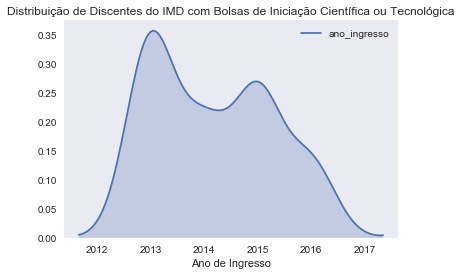

In [12]:
#Gráfico da distribuição de alunos ingressantes do IMD que tiveram bolsa para iniciação científica ou tecnológica, 2013-2016
sns.set()
sns.set_style('dark')
sns.set_context("notebook")
sns.kdeplot(imd_total['ano_ingresso'], shade=True)
plt.xlabel("Ano de Ingresso")
plt.title("Distribuição de Discentes do IMD com Bolsas de Iniciação Científica ou Tecnológica")
plt.show()

Por meio do dataframe "imd_total", o qual contém os dados referentes aos alunos do IMD que fizeram iniciação científica ou tecnológica, foi possível desenvolver o gráfico acima que apresenta o crescimento e o decrescimento na quantidade de alunos bolsistas, sendo os anos na base do gráfico referentes ao ingresso do discente no IMD. É perceptível os picos em 2013 e 2015, logo, seus respectivos ingressantes apresentaram um maior engajamento com projetos de IC ou IT ao longo do curso. Contudo, também torna-se notável que ocorreram quedas nos valores em 2014 e, principalmente, em 2016, onde foi registrado a menor quantidade de alunos.

Ainda trabalhando nos dados referentes aos discentes do IMD, procuramos encontrar quantos alunos, dentre os da graduação, foram para a pós-graduação, mais precisamente, iniciaram o mestrado, em 2016, tendo em vista uma formação após 7 semestres, tempo mínimo estabelecido para o curso de Bacharelado em Tecnologia da Informação.

In [13]:
pos_grad = ['nome_discente','nivel_ensino','status','nome_unidade','nome_unidade_gestora']
imd_total.rename(columns={'nivel_ensino': 'nivel_ensino_'}, inplace=True)
imd_total.rename(columns={'status': 'status_'}, inplace=True)
imd_total.rename(columns={'nome_unidade': 'nome_unidade_'}, inplace=True)
imd_total.rename(columns={'nome_unidade_gestora': 'nome_unidade_gestora_'}, inplace=True)
pos_graduacao = pd.merge(imd_total, discentes2016, on='nome_discente')[pos_grad]
pos_graduacao[~(pos_graduacao.status == 'CANCELADO') & (pos_graduacao.nivel_ensino == 'MESTRADO')]

,nome_discente,nivel_ensino,status,nome_unidade,nome_unidade_gestora
0,CEPHAS ALVES DA SILVEIRA BARRETO,MESTRADO,ATIVO,PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SOF...,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
17,JHOSEPH KELVIN LOPES DE JESUS,MESTRADO,ATIVO,PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMAS E COMPUT...,CENTRO DE CIÊNCIAS EXATAS E DA TERRA


In [28]:
imd_total[~(imd_total.status_ == 'CANCELADO') & (imd_total.nome_curso == 'TECNOLOGIA DA INFORMAÇÃO') & (imd_total.ano_ingresso == 2013)].matricula.count()

42

Com esses dados, podemos determinar que entre os 42 discentes ingressantes em 2013 que receberam bolsa de iniciação científica ou tecnológica ao longo do curso, apenas 2 iniciaram o mestrado em 2016 na UFRN, logo, a taxa foi de, aproximadamente, 4.76%.

Também torna-se válido explorar os dados referentes aos docentes que trabalharam em conjunto com os alunos apresentados nas análises anteriores, portanto, em seguida procuramos encontrar uma relação de frequência entre os orientadores dos projetos. Desta vez foram utilizadas as colunas "matricula", "nome_discente", "ano_ingresso", "nivel_ensino", "codigo_projeto", "ano_projeto", "id_orientador", "orientador", "categoria", "unidade_projeto", "status_projeto" e "nome_unidade", com o objetivo de estudar os dados referentes aos projetos desenvolvidos.

In [17]:
columns = ['matricula', 'nome_discente', 'ano_ingresso', 'nivel_ensino', 'titulo', 'codigo_projeto', 'ano_projeto', 'id_orientador', 'orientador', 'categoria', 'unidade_projeto', 'status_projeto', 'nome_unidade']

#Merge entre o dataframe bolsistas e discentes2013
projetos2013 = pd.merge(bolsistas, discentes2013, on='matricula')[columns]

#Merge entre o dataframe bolsistas e discentes2014
projetos2014 = pd.merge(bolsistas, discentes2014, on='matricula')[columns]

#Merge entre o dataframe bolsistas e discentes2015
projetos2015 = pd.merge(bolsistas, discentes2015, on='matricula')[columns]

#Merge entre o dataframe bolsistas e discentes2016
projetos2016 = pd.merge(bolsistas, discentes2016, on='matricula')[columns]

In [18]:
#Retirando os dados duplicados 
projetos2013 = projetos2013[projetos2013.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]
projetos2013.drop(labels=[2271], inplace=True)

projetos2014.drop(labels=737, inplace=True)
projetos2014 = projetos2014[projetos2014.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]
projetos2014.drop(labels=[578,580,892,1459,1657], inplace=True)

projetos2015 = projetos2015[projetos2015.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]
projetos2015.drop(labels=[639,743,745,1253,1390,1391,1414], inplace=True)

projetos2016 = projetos2016[projetos2016.nome_unidade.str.contains("INSTITUTO METROPOLE DIGITAL")]
projetos2016.drop(labels=[776], inplace=True)

In [36]:
#Reunindo todos os dados referentes a projetos realizados por alunos do IMD em um único dataframe
projetos_anos = [projetos2013, projetos2014, projetos2015, projetos2016]
projetos = pd.concat(projetos_anos)
projetos

,matricula,nome_discente,ano_ingresso,nivel_ensino,titulo,codigo_projeto,ano_projeto,id_orientador,orientador,categoria,unidade_projeto,status_projeto,nome_unidade
101,2013043063,ÁLVARO PORTELA FIGUEIREDO NETO,2013,GRADUAÇÃO,Ferramenta não invasiva para detecção de movim...,PVJ9882-2013,2013,5753852,MARCONI CAMARA RODRIGUES,Iniciação Científica (IC),ESCOLA DE CIÊNCIAS E TECNOLOGIA - ECT,FINALIZADO,INSTITUTO METROPOLE DIGITAL
102,2013043063,ÁLVARO PORTELA FIGUEIREDO NETO,2013,GRADUAÇÃO,Detector de movimento por vibração.,PVJ9882-2013,2013,5753852,MARCONI CAMARA RODRIGUES,Iniciação Científica (IC),ESCOLA DE CIÊNCIAS E TECNOLOGIA - ECT,FINALIZADO,INSTITUTO METROPOLE DIGITAL
110,2013309863,AMANDA ARAUJO SILVA,2013,TÉCNICO,Estudo da evolução da abundância de lítio nos ...,PVB9554-2013,2013,5755345,MATTHIEU SEBASTIEN CASTRO,Iniciação Científica (IC),DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL ...,PENDENTE DE RELATORIO,INSTITUTO METROPOLE DIGITAL
181,2013020416,ANA PAULA LOPES DE SOUZA,2013,GRADUAÇÃO,Desenvolvimento de uma ferramenta gráfica para...,PVB11460-2014,2014,25978,BRUNO MOTTA DE CARVALHO,Iniciação Científica (IC),DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLIC...,FINALIZADO,INSTITUTO METROPOLE DIGITAL
191,2013019470,ANDERSON MATHEUS SILVA,2013,GRADUAÇÃO,CAMADA DE SOFTWARE PARA GERENCIAMENTO DE COZIN...,PIT12360-2015,2015,5756802,GUSTAVO GIRAO BARRETO DA SILVA,Iniciação Tecnológica (IT),INSTITUTO METROPOLE DIGITAL - IMD,FINALIZADO,INSTITUTO METROPOLE DIGITAL
425,2013023300,CEPHAS ALVES DA SILVEIRA BARRETO,2013,GRADUAÇÃO,Solução de Localização Indoor usando Técnicas...,PVB11335-2014,2014,5753616,GIBEON SOARES DE AQUINO JUNIOR,Iniciação Científica (IC),DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLIC...,FINALIZADO,INSTITUTO METROPOLE DIGITAL
441,2013018973,CIRO MARTINS PINTO,2013,GRADUAÇÃO,Sistema de refrigeração inteligente,PVB11335-2014,2014,5755871,IVANOVITCH MEDEIROS DANTAS DA SILVA,Iniciação Científica (IC),DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLIC...,FINALIZADO,INSTITUTO METROPOLE DIGITAL
442,2013018973,CIRO MARTINS PINTO,2013,GRADUAÇÃO,Integração de sensores em luva para classifica...,PIG9681-2013,2013,5755392,RAFAEL VIDAL AROCA,Iniciação Científica (IC),INSTITUTO METROPOLE DIGITAL - IMD,FINALIZADO,INSTITUTO METROPOLE DIGITAL
443,2013018973,CIRO MARTINS PINTO,2013,GRADUAÇÃO,Refrigeração Sustentável em Repartições Públic...,PVB11335-2014,2014,5755871,IVANOVITCH MEDEIROS DANTAS DA SILVA,Iniciação Científica (IC),DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLIC...,FINALIZADO,INSTITUTO METROPOLE DIGITAL
505,2013046851,DANIEL TIAGO DE SOUZA BRITO,2013,GRADUAÇÃO,Plataforma para busca de recursos educativos d...,PIT12982-2016,2016,5757088,DENNYS LEITE MAIA,Iniciação Científica (IC),INSTITUTO METROPOLE DIGITAL - IMD,PENDENTE DE RELATORIO,INSTITUTO METROPOLE DIGITAL


Por meio dos dados anteriores, foi possível extrair a frequência de presença dos orientadores ao longo dos projetos desenvolvidos por alunos do IMD, a qual encontra-se abaixo.

In [37]:
#Relação dos 15 professores que mais orientaram diferentes alunos
projetos[~projetos.matricula.duplicated()].orientador.value_counts().head(15)

APUENA VIEIRA GOMES                    8
EDUARDO HENRIQUE DA SILVA ARANHA       6
JORGE ESTEFANO SANTANA DE SOUZA        5
ALUIZIO FERREIRA DA ROCHA NETO         5
EUGENIO PACCELLI AGUIAR FREIRE         5
IVANOVITCH MEDEIROS DANTAS DA SILVA    5
EDGARD DE FARIA CORREA                 4
ALYSON MATHEUS DE CARVALHO SOUZA       4
ELIZABETH FERREIRA GOUVEA GOLDBARG     4
DENNYS LEITE MAIA                      4
MONICA MAGALHAES PEREIRA               4
UIRA KULESZA                           3
EIJI ADACHI MEDEIROS BARBOSA           3
GIBEON SOARES DE AQUINO JUNIOR         3
ISABEL DILLMANN NUNES                  3
Name: orientador, dtype: int64

Contudo, é possível, ainda, que a estrutura dos projetos possibilitem o desenvolvimento de subprojetos. Logo, para o efeito de análise, foi decidido que neste estudo seria considerado que os dados provenientes da coluna "codigo_projeto" representariam os projetos-base e as informações da coluna "titulo" seriam referentes aos subprojetos.

In [38]:
#Relação dos 15 professores que participaram em uma maior quantidade de projetos-base diferentes como orientadores
projetos[~projetos.codigo_projeto.duplicated()].orientador.value_counts().head(15)

MONICA MAGALHAES PEREIRA                  4
CARLOS EDUARDO DA SILVA                   3
EUGENIO PACCELLI AGUIAR FREIRE            3
MARCIA JACYNTHA NUNES RODRIGUES LUCENA    3
GUSTAVO GIRAO BARRETO DA SILVA            3
EDGARD DE FARIA CORREA                    3
ALUIZIO FERREIRA DA ROCHA NETO            3
THAIS VASCONCELOS BATISTA                 2
ALYSON MATHEUS DE CARVALHO SOUZA          2
AUGUSTO JOSE VENANCIO NETO                2
IVANOVITCH MEDEIROS DANTAS DA SILVA       2
MAISA FERNANDES DUTRA VELOSO              2
GIBEON SOARES DE AQUINO JUNIOR            2
JORGE ESTEFANO SANTANA DE SOUZA           2
EDUARDO HENRIQUE DA SILVA ARANHA          2
Name: orientador, dtype: int64

In [39]:
#Relação dos 15 professores que participaram em uma maior quantidade de subprojetos diferentes como orientadores
projetos[~projetos.titulo.duplicated()].orientador.value_counts().head(15)

ELIZABETH FERREIRA GOUVEA GOLDBARG     8
IVANOVITCH MEDEIROS DANTAS DA SILVA    8
EDGARD DE FARIA CORREA                 7
JORGE ESTEFANO SANTANA DE SOUZA        7
MONICA MAGALHAES PEREIRA               7
EDUARDO HENRIQUE DA SILVA ARANHA       7
EUGENIO PACCELLI AGUIAR FREIRE         6
ALUIZIO FERREIRA DA ROCHA NETO         5
DENNYS LEITE MAIA                      5
GIBEON SOARES DE AQUINO JUNIOR         5
EIJI ADACHI MEDEIROS BARBOSA           4
ALYSON MATHEUS DE CARVALHO SOUZA       4
MARJORY CRISTIANY DA COSTA ABREU       4
CARLOS EDUARDO DA SILVA                4
UIRA KULESZA                           4
Name: orientador, dtype: int64

Ainda trabalhando com o dataframe "projetos", foi decidido que, por último, seria analisado a quantidade de projetos-base e de subprojetos que foram desenvolvidos por alunos do IMD.

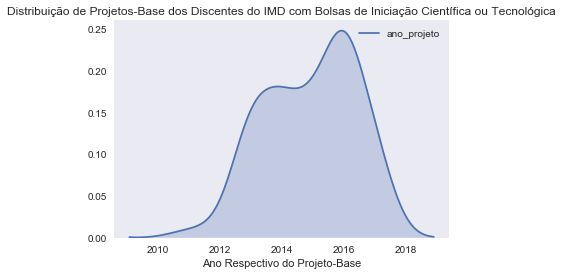

In [41]:
#Gráfico que apresenta a distribuição de projetos-base dos discentes do IMD entre 2013 a 2016 
sns.set()
sns.set_style('dark')
sns.set_context("notebook")
sns.kdeplot(projetos['ano_projeto'][~projetos.codigo_projeto.duplicated()], shade=True)
plt.xlabel("Ano Respectivo do Projeto-Base")
plt.title("Distribuição de Projetos-Base dos Discentes do IMD com Bolsas de Iniciação Científica ou Tecnológica")
plt.show()

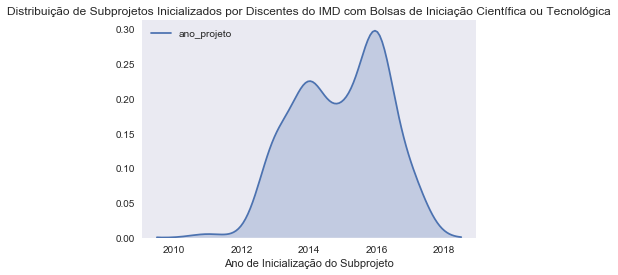

In [40]:
#Gráfico que reúne quantos subprojetos foram desenvolvidos por discentes do IMD entre 2013 e 2016
sns.set()
sns.set_style('dark')
sns.set_context("notebook")
sns.kdeplot(projetos['ano_projeto'][~projetos.titulo.duplicated()], shade=True)
plt.xlabel("Ano de Inicialização do Subprojeto")
plt.title("Distribuição de Subprojetos Inicializados por Discentes do IMD com Bolsas de Iniciação Científica ou Tecnológica")
plt.show()

Por meio da apresentação dos gráficos acima, pode-se perceber uma grande semelhança entre os dois, ainda que o primeiro apresente um perfil mais constante de crescimento ao longo de suas curvas, enquanto que o segundo apresenta picos mais extremos em 2014 e 2016, com decréscimos por volta de 2015. Logo, é perceptível que à medida que os projetos-base são criados, há uma tendência de criação de um ou mais subprojetos para suprir a necessidade do projeto-base. Com isso, é possível concluir, também, que os projetos-base de 2014 e 2016 apresentaram uma maior ramificação em subprojetos, em contraste com os demais anos.